In [2]:
# Pytorch MNIST digits example from https://machinelearningmastery.com/handwritten-digit-recognition-with-lenet5-model-in-pytorch/
# THIS IS ME PLAYING WITH a relatively large MLP for fun
# SEEMS TO WORK WELL > 98% ACCURACY!!!


# Imports
import torch # Main PyTorch module
import torch.nn as nn # Neural Network module
import torch.optim as optim  # Optimization module
import torchvision # Computer Vision module
import matplotlib.pyplot as plt
#from tqdm import tqdm


In [5]:

'''
Pytorch MNIST MLP Example
Load MNIST data, define a MLP, train and evaluate
'''

# Set device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu") # Mac M1/M2 GPU support 
#device = torch.device("cpu")  # sometimes quicker on CPU for small models!!
print(f"Using {device} device")

# set random seed
torch.manual_seed(42) #

# Load and prepare data
# Note: MNIST images are grayscale 28x28 pixels with pixel values 0-255

transform = torchvision.transforms.Compose([ # define the transform
    torchvision.transforms.ToTensor(), # convert to tensor
    torchvision.transforms.Normalize((0,), (128)), # normalize to mean 0 and stddev 128
])

BATCHSIZE = 100 # how many samples per batch to load

train = torchvision.datasets.MNIST('data/', train=True, download=True, transform=transform) # load train data
test = torchvision.datasets.MNIST('data/', train=False, download=True, transform=transform) # load test data
trainloader = torch.utils.data.DataLoader(train, shuffle=True, batch_size=BATCHSIZE) # create data loader
testloader = torch.utils.data.DataLoader(test, shuffle=True, batch_size=BATCHSIZE)  # create data loader
print(f"Number of training samples: {len(train)}")
print(f"Number of test samples: {len(test)}")
print(f"Number of batches per epoch: {len(trainloader)}")


Using mps device
Number of training samples: 60000
Number of test samples: 10000
Number of batches per epoch: 600


/var/folders/hf/vz4h4wks33b6j2lhgdccrv680000gp/T/ipykernel_73010/904206092.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_tensor = torch.tensor(img)  # Convert NumPy array to PyTorch tensor


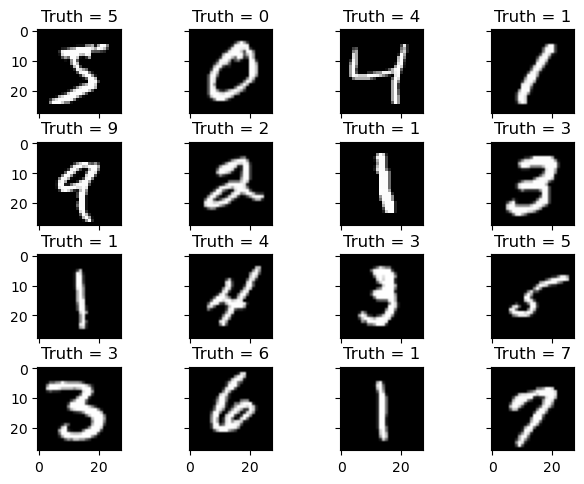

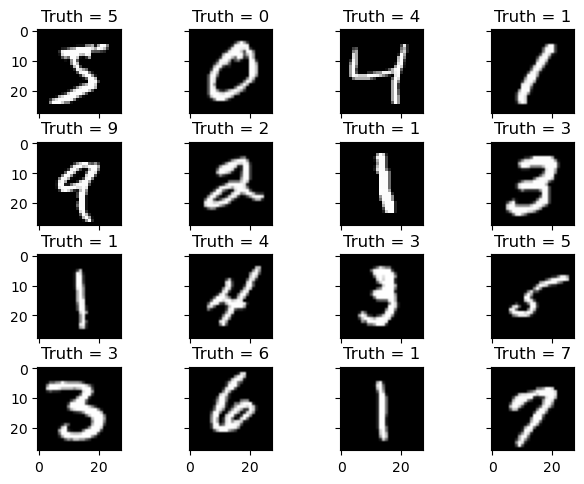

In [6]:
# Plot some of the training images with their labels and no transform
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
fig.tight_layout()
for i in range(4):
    for j in range(4):
        img = train.data[4*i+j]  # this does not have transform applied (use dataloader)
        ax[i][j].imshow(img, cmap="gray")
        ax[i][j].set_title('Truth = {}'.format(train.targets.tolist()[4*i+j]))
        img_tensor = torch.tensor(img)  # Convert NumPy array to PyTorch tensor
        # print(torch.min(img_tensor), torch.max(img_tensor)) # print min/max of tensor
        #print(np.min(img), np.max(img))
plt.show()

# Plot some of the training images with their labels and with transform
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
fig.tight_layout()
for i in range(4):
    for j in range(4):
        img = trainloader.dataset.data[4*i+j].numpy()  # this does have transform applied
        ax[i][j].imshow(img, cmap="gray")
        ax[i][j].set_title('Truth = {}'.format(train.targets.tolist()[4*i+j]))
        # print(torch.min(img), torch.max(img)) # print min/max of tensor
        #print(np.min(img), np.max(img))
plt.show()

| Step                     | Function                   | Purpose                                 |
| ------------------------ | -------------------------- | --------------------------------------- |
| `torch.device()`         | Select CPU or GPU          | Runs computations on available hardware |
| `torch.manual_seed()`    | Set seed                   | Reproducibility                         |
| `transforms.Compose()`   | Build transform pipeline   | Chain preprocessing steps               |
| `transforms.ToTensor()`  | Convert PIL → Tensor       | Convert to PyTorch format               |
| `transforms.Normalize()` | Normalize pixels           | Helps training stability                |
| `datasets.MNIST()`       | Load dataset               | Fetch train/test splits                 |
| `DataLoader()`           | Create batches             | Efficient data iteration                |
| `len()` on loaders       | Compute sample/batch count | For logging/tracking                    |


In [7]:
# Define MLP
class MLP(nn.Module):
    def __init__(self):
        super().__init__() # initialize parent class
        self.flat = nn.Flatten() # flatten 28x28 images to 784 vector
        self.fc1 = nn.Linear(28*28, 512) # first fully connected layer
        self.dropout = nn.Dropout(0.2) # dropout layer with 20% dropout
        self.relu = nn.ReLU() # ReLU activation
        self.fc2 = nn.Linear(512, 64) # second fully connected layer
        self.output = nn.Linear(64, 10) # output layer for 10 classes
        
    def forward(self, x): # forward pass
        x = self.flat(x) # flatten input
        x = self.fc1(x) # first layer
        x = self.dropout(x) # dropout
        x = self.relu(x)# ReLU activation
        x = self.fc2(x)# second layer
        x = self.dropout(x)# dropout
        x = self.relu(x) # ReLU activation              
        x = self.output(x)# output layer
        return x

# Define MLP2 - a deeper MLP
class MLP2(nn.Module):
    def __init__(self):
        super().__init__()

        neurons1 = 512
        neurons2 = 256
        neurons3 = 64

        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(28*28, neurons1)
        self.fc2 = nn.Linear(neurons1, neurons2)
        self.fc3 = nn.Linear(neurons2, neurons3)
        self.dropout = nn.Dropout(0.2)
        self.relu = nn.ReLU()
        self.output = nn.Linear(neurons3, 10)
        
    def forward(self, x):
        x = self.flat(x)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.dropout(x)
        x = self.relu(x)               
        x = self.output(x)
        return x


# Define MLP3 - an even deeper MLP!!
class MLP3(nn.Module):
    def __init__(self):
        super().__init__()

        neurons1 = 512
        neurons2 = 256
        neurons3 = 128
        neurons4 = 64

        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(28*28, neurons1)
        self.fc2 = nn.Linear(neurons1, neurons2)
        self.fc3 = nn.Linear(neurons2, neurons3)
        self.fc4 = nn.Linear(neurons3, neurons4)
        self.dropout = nn.Dropout(0.2)
        self.relu = nn.ReLU()
        self.output = nn.Linear(neurons4, 10)
        
    def forward(self, x):
        x = self.flat(x)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.dropout(x)
        x = self.relu(x)                 
        x = self.output(x)
        return x


# Define CNN
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 10, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=1)
        self.dropout = nn.Dropout(0.2)
        self.flat = nn.Flatten()
        self.fc = nn.Linear(27*27*10, 128)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.relu1(self.conv(x))
        x = self.pool(x)
        x = self.dropout(x)
        x = self.relu2(self.fc(self.flat(x)))
        x = self.output(x)
        return x
    
# Very shallow MLP to show as example
class MLP_shallow(nn.Module):
    def __init__(self):
        super().__init__()
        self.flat = nn.Flatten() # flatten 28x28 images to 784 vector
        self.fc1 = nn.Linear(28*28, 16) # first fully connected layer, with 16 hidden neurons and 784 input features
        self.relu = nn.ReLU()# ReLU activation
        self.output = nn.Linear(16, 10) # output layer for 10 classes
        
    def forward(self, x):
        x = self.flat(x) # flatten input
        x = self.fc1(x) # first layer
        x = self.relu(x) # ReLU activation
        x = self.output(x) # output layer
        return x

In [8]:
# initialize and set optimizer and loss function
#model = CNN()
model = MLP_shallow()  
#model = MLP()
#model = MLP2()
#model = MLP3()

model.to(device)  # send model to device 
optimizer = optim.Adam(model.parameters(), lr=0.01) # Adam optimizer  an adaptive optimizer that adjusts learning rates for each parameter individually. It’s popular because it usually converges faster than plain SGD.
loss_fn = nn.CrossEntropyLoss() # cross entropy loss function

In [10]:
# show architecture
import torchinfo 

torchinfo.summary(model)


Layer (type:depth-idx)                   Param #
MLP_shallow                              --
├─Flatten: 1-1                           --
├─Linear: 1-2                            12,560
├─ReLU: 1-3                              --
├─Linear: 1-4                            170
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0

In [11]:
# Training loop 
n_epochs = 20 # number of epochs to train
best_acc = 0  # best accuracy so far
for epoch in range(n_epochs):
    print(f"Epoch {epoch+1} training...")
    model.train() # set model to training mode
    for X_batch, y_batch in trainloader: # iterate over batches
        X_batch = X_batch.to(device) # send to device
        y_batch = y_batch.to(device) # send to device
        y_pred = model(X_batch) # forward pass
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation for each epoch
    model.eval()
    acc = 0
    count = 0
    for X_batch, y_batch in testloader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        y_pred = model(X_batch)
        acc += (torch.argmax(y_pred, 1) == y_batch).float().sum()
        count += len(y_batch)
    
    acc = acc / count
    print("Epoch %d: model accuracy %.2f%%" % (epoch+1, acc*100))
    print("-------------------------------")
    
    # stop if accuracy goes down
    if acc > best_acc:
        best_acc = acc
    else:
        print("Validation accuracy went down, stopping...")
        break
print('Finished training!')

Epoch 1 training...
Epoch 1: model accuracy 81.09%
-------------------------------
Epoch 2 training...
Epoch 2: model accuracy 85.44%
-------------------------------
Epoch 3 training...
Epoch 3: model accuracy 87.11%
-------------------------------
Epoch 4 training...
Epoch 4: model accuracy 87.58%
-------------------------------
Epoch 5 training...
Epoch 5: model accuracy 88.48%
-------------------------------
Epoch 6 training...
Epoch 6: model accuracy 88.69%
-------------------------------
Epoch 7 training...
Epoch 7: model accuracy 88.80%
-------------------------------
Epoch 8 training...
Epoch 8: model accuracy 89.01%
-------------------------------
Epoch 9 training...
Epoch 9: model accuracy 88.83%
-------------------------------
Validation accuracy went down, stopping...
Finished training!


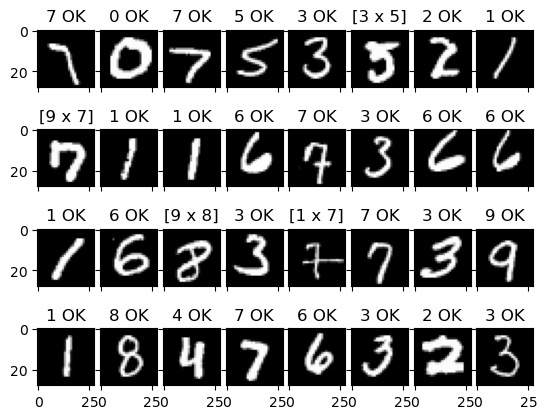

In [12]:
# plot some examples
import numpy as np
import matplotlib.pyplot as plt
nx = 4
ny = 8
fig, ax = plt.subplots(nx, ny, sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.1, hspace=0.4)

# get a random batch of input data
xb, yb = next(iter(testloader))

# or just iterate over them
k = 0
for i in range(nx):
    for j in range(ny):

        # do itmyself
        #idx = np.random.randint(0,len(test.data)-1) # use dataloader to get random one
        #img = test.data[idx]
        #true_label = test.targets[idx].item()

        # use dataloaders to shuffle and get result
        xb1 = xb[k]
        yb1 = yb[k]
        k += 1

        img = xb1.view(28,28).numpy()
        ax[i][j].imshow(img, cmap="gray")
        true_label = yb1.item()
        pred_label = torch.argmax(model(xb1.to(device)).to(device),1).item()

        #ax[i][j].set_title(f"pred {torch.argmax(model(test.data[idx].unsqueeze(0).unsqueeze(0).float()/128),1).item()}")
        if (pred_label == true_label):
            title = '{0:d} OK'.format(pred_label)
        else:
            title = '[{0:d} x {1:d}]'.format(pred_label, true_label)
        ax[i][j].set_title(title)

plt.show()